# DL Models

In [84]:
import pandas as pd

# Load the data from the uploaded CSV file
file_path = 'SP500_Last_10_Years.csv'
sp500_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
sp500_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-04-21,1865.790039,1871.890015,1863.180054,1871.890015,1871.890015,2642500000
1,2014-04-22,1872.569946,1884.890015,1872.569946,1879.550049,1879.550049,3215440000
2,2014-04-23,1879.319946,1879.750000,1873.910034,1875.390015,1875.390015,3085720000
3,2014-04-24,1881.969971,1884.060059,1870.239990,1878.609985,1878.609985,3191830000
4,2014-04-25,1877.719971,1877.719971,1859.699951,1863.400024,1863.400024,3213020000


In [86]:
sp500_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [58]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Convert 'Date' to datetime format
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])

# Sort data just in case
sp500_data.sort_values('Date', inplace=True)

# Extract relevant features
features = sp500_data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Normalize the features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Define the window size and create sequences
window_size = 30
X = []
y = []

for i in range(window_size, len(features_scaled)):
    X.append(features_scaled[i-window_size:i])
    y.append(features_scaled[i, 0])  # Target is the 'Open' price

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets (8 years train, 2 years test)
# Assuming 252 trading days per year
train_size = 8 * 252
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
train_dates, test_dates = sp500_data['Date'][window_size:train_size+window_size], sp500_data['Date'][train_size+window_size:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape, train_dates.iloc[0], test_dates.iloc[0]


((2016, 30, 5),
 (470, 30, 5),
 (2016,),
 (470,),
 Timestamp('2014-06-03 00:00:00'),
 Timestamp('2022-06-03 00:00:00'))

##  Model definitions

In [59]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define LSTM Model
def create_lstm_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(50, return_sequences=True, input_shape=input_shape),
        tf.keras.layers.LSTM(50),
        tf.keras.layers.Dense(25),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define GRU Model
def create_gru_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.GRU(50, return_sequences=True, input_shape=input_shape),
        tf.keras.layers.GRU(50),
        tf.keras.layers.Dense(25),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define ConvLSTM Model
def create_convlstm_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
        tf.keras.layers.LSTM(50, return_sequences=True),
        tf.keras.layers.LSTM(50),
        tf.keras.layers.Dense(25),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


# Define RNN Model
def create_rnn_model(input_shape):
    model = tf.keras.models.Sequential([
       tf.keras.layers.SimpleRNN(50, return_sequences=True, input_shape=input_shape),
        tf.keras.layers.SimpleRNN(50),
       tf.keras.layers. Dense(25),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model




## LSTM Model

In [60]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Train and save the best model for LSTM
lstm_checkpoint = ModelCheckpoint('lstm_best_weights.h5', save_best_only=True, monitor='val_loss', mode='min')
lstm_model = create_lstm_model((X_train.shape[1], X_train.shape[2]))
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, 
                              validation_data=(X_test, y_test), verbose=1, callbacks=[lstm_checkpoint])

Epoch 1/50
63/63 [==============================] - 2s 13ms/step - loss: 0.0098 - val_loss: 0.0015
Epoch 2/50
22/63 [=========>....................] - ETA: 0s - loss: 3.7250e-04

/Users/ahmadshahzad/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - 1s 8ms/step - loss: 3.8254e-04 - val_loss: 0.0011
Epoch 3/50
63/63 [==============================] - 1s 9ms/step - loss: 3.7702e-04 - val_loss: 0.0016
Epoch 4/50
63/63 [==============================] - 1s 8ms/step - loss: 3.3293e-04 - val_loss: 8.0636e-04
Epoch 5/50
63/63 [==============================] - 1s 8ms/step - loss: 2.9592e-04 - val_loss: 7.7426e-04
Epoch 6/50
63/63 [==============================] - 1s 8ms/step - loss: 2.7103e-04 - val_loss: 7.8502e-04
Epoch 7/50
63/63 [==============================] - 1s 8ms/step - loss: 2.6640e-04 - val_loss: 7.6696e-04
Epoch 8/50
63/63 [==============================] - 1s 8ms/step - loss: 2.4588e-04 - val_loss: 7.6409e-04
Epoch 9/50
63/63 [==============================] - 1s 8ms/step - loss: 2.3603e-04 - val_loss: 6.4865e-04
Epoch 10/50
63/63 [==============================] - 1s 8ms/step - loss: 2.2819e-04 - val_loss: 6.6011e-04
Epoch 11/50
63/63 [==============================] - 1s 8ms/step

In [61]:
lstm_model.load_weights('lstm_best_weights.h5')
lstm_predictions = lstm_model.predict(X_test)

15/15 [==============================] - 0s 2ms/step


## GRU model

In [62]:
# Train and save the best model for GRU
gru_checkpoint = ModelCheckpoint('gru_best_weights.h5', save_best_only=True, monitor='val_loss', mode='min')
gru_model = create_gru_model((X_train.shape[1], X_train.shape[2]))
gru_history = gru_model.fit(X_train, y_train, epochs=50, batch_size=32, 
                            validation_data=(X_test, y_test), verbose=1, callbacks=[gru_checkpoint])

Epoch 1/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0037 - val_loss: 4.4065e-04
Epoch 2/50
63/63 [==============================] - 0s 7ms/step - loss: 1.2504e-04 - val_loss: 2.9057e-04
Epoch 3/50
63/63 [==============================] - 0s 7ms/step - loss: 1.0091e-04 - val_loss: 2.2238e-04
Epoch 4/50
63/63 [==============================] - 0s 7ms/step - loss: 9.2537e-05 - val_loss: 2.0322e-04
Epoch 5/50
63/63 [==============================] - 0s 7ms/step - loss: 8.0873e-05 - val_loss: 1.9839e-04
Epoch 6/50
63/63 [==============================] - 0s 7ms/step - loss: 8.0273e-05 - val_loss: 1.9432e-04
Epoch 7/50
63/63 [==============================] - 0s 7ms/step - loss: 8.4249e-05 - val_loss: 1.5057e-04
Epoch 8/50
63/63 [==============================] - 1s 8ms/step - loss: 6.4174e-05 - val_loss: 2.0725e-04
Epoch 9/50
63/63 [==============================] - 0s 7ms/step - loss: 5.9543e-05 - val_loss: 1.2344e-04
Epoch 10/50
63/63 [==============================

In [63]:
gru_model.load_weights('gru_best_weights.h5')
gru_predictions = gru_model.predict(X_test)

15/15 [==============================] - 0s 2ms/step


## ConvLSTM

In [64]:
# Train and save the best model for ConvLSTM
convlstm_checkpoint = ModelCheckpoint('convlstm_best_weights.h5', save_best_only=True, monitor='val_loss', mode='min')
convlstm_model = create_convlstm_model((X_train.shape[1], X_train.shape[2]))
convlstm_history = convlstm_model.fit(X_train, y_train, epochs=50, batch_size=32, 
                                      validation_data=(X_test, y_test), verbose=1, callbacks=[convlstm_checkpoint])

Epoch 1/50
63/63 [==============================] - 2s 14ms/step - loss: 0.0094 - val_loss: 0.0016
Epoch 2/50
63/63 [==============================] - 1s 10ms/step - loss: 4.9316e-04 - val_loss: 0.0013
Epoch 3/50
63/63 [==============================] - 1s 10ms/step - loss: 4.4853e-04 - val_loss: 0.0010
Epoch 4/50
63/63 [==============================] - 1s 10ms/step - loss: 3.9028e-04 - val_loss: 8.9485e-04
Epoch 5/50
63/63 [==============================] - 1s 10ms/step - loss: 3.4527e-04 - val_loss: 8.5404e-04
Epoch 6/50
63/63 [==============================] - 1s 10ms/step - loss: 3.5716e-04 - val_loss: 0.0016
Epoch 7/50
63/63 [==============================] - 1s 10ms/step - loss: 3.1835e-04 - val_loss: 6.6270e-04
Epoch 8/50
63/63 [==============================] - 1s 9ms/step - loss: 2.8483e-04 - val_loss: 6.9136e-04
Epoch 9/50
63/63 [==============================] - 1s 9ms/step - loss: 2.4191e-04 - val_loss: 7.9557e-04
Epoch 10/50
63/63 [==============================] - 1s 10m

In [65]:
convlstm_model.load_weights('convlstm_best_weights.h5')
convlstm_predictions = convlstm_model.predict(X_test)

15/15 [==============================] - 0s 3ms/step


## RNN

In [66]:
## Create and train the RNN model
rnn_model = create_rnn_model((X_train.shape[1], X_train.shape[2]))
rnn_checkpoint = ModelCheckpoint('rnn_best_weights.h5', save_best_only=True, monitor='val_loss', mode='min')
rnn_history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32,
                            validation_data=(X_test, y_test), callbacks=[rnn_checkpoint], verbose=1)


Epoch 1/50
63/63 [==============================] - 1s 5ms/step - loss: 0.0120 - val_loss: 0.0019
Epoch 2/50
63/63 [==============================] - 0s 4ms/step - loss: 6.8881e-04 - val_loss: 0.0014
Epoch 3/50
63/63 [==============================] - 0s 4ms/step - loss: 3.8502e-04 - val_loss: 9.2229e-04
Epoch 4/50
63/63 [==============================] - 0s 4ms/step - loss: 2.8570e-04 - val_loss: 0.0016
Epoch 5/50
63/63 [==============================] - 0s 4ms/step - loss: 2.1947e-04 - val_loss: 6.7041e-04
Epoch 6/50
63/63 [==============================] - 0s 4ms/step - loss: 2.1230e-04 - val_loss: 6.1887e-04
Epoch 7/50
63/63 [==============================] - 0s 4ms/step - loss: 1.5263e-04 - val_loss: 4.7361e-04
Epoch 8/50
63/63 [==============================] - 0s 4ms/step - loss: 1.6547e-04 - val_loss: 6.1696e-04
Epoch 9/50
63/63 [==============================] - 0s 4ms/step - loss: 1.4145e-04 - val_loss: 3.2685e-04
Epoch 10/50
63/63 [==============================] - 0s 4ms/st

In [67]:
# Load the best weights and make predictions
rnn_model.load_weights('rnn_best_weights.h5')
rnn_predictions = rnn_model.predict(X_test)



15/15 [==============================] - 0s 1ms/step


## Model Comparison

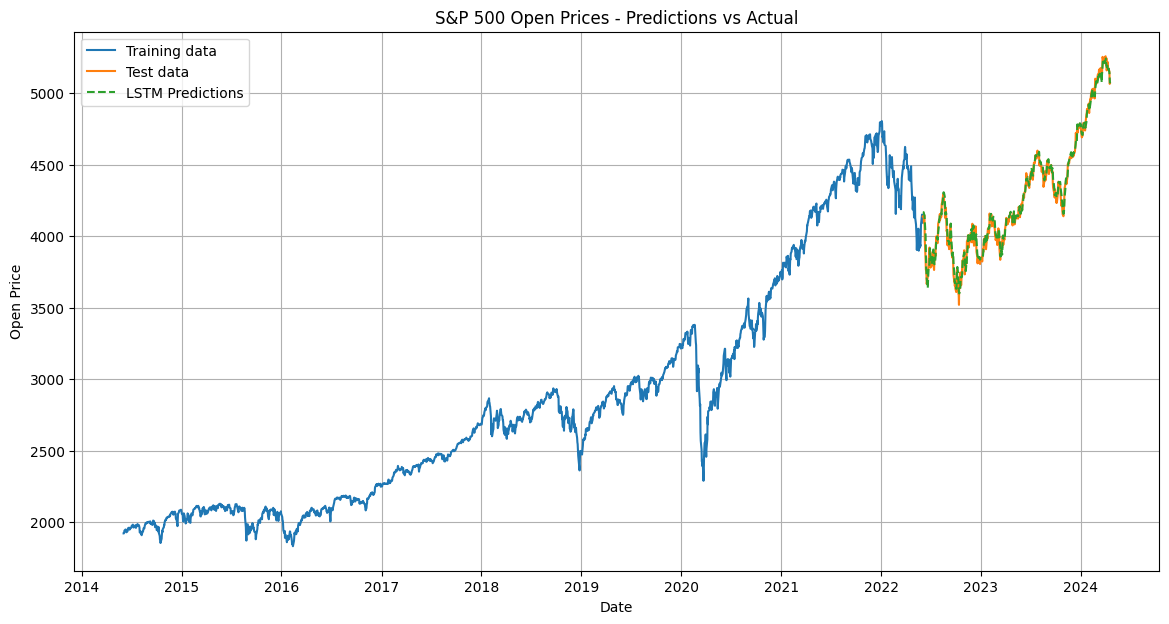

In [81]:
import matplotlib.pyplot as plt

# Helper function to invert predictions
def invert_predictions(predictions):
    # Create a dummy array with the same shape as the training data
    dummy = np.zeros((len(predictions), 5))  # Assuming there are 5 features
    # Place the predictions in the column corresponding to 'Open' prices
    dummy[:, 0] = predictions.ravel()
    # Inverse transform using the original scaler
    return scaler.inverse_transform(dummy)[:, 0]

# Correct the indices for plotting
plt.figure(figsize=(14, 7))
plt.plot(train_dates, scaler.inverse_transform(features_scaled[window_size:train_size+window_size, :])[:, 0], label='Training data')
plt.plot(test_dates, scaler.inverse_transform(features_scaled[train_size+window_size:, :])[:, 0], label='Test data')
plt.plot(test_dates, invert_predictions(lstm_predictions), label='LSTM Predictions',linestyle='--')
plt.title('S&P 500 Open Prices - Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(True)

plt.show()


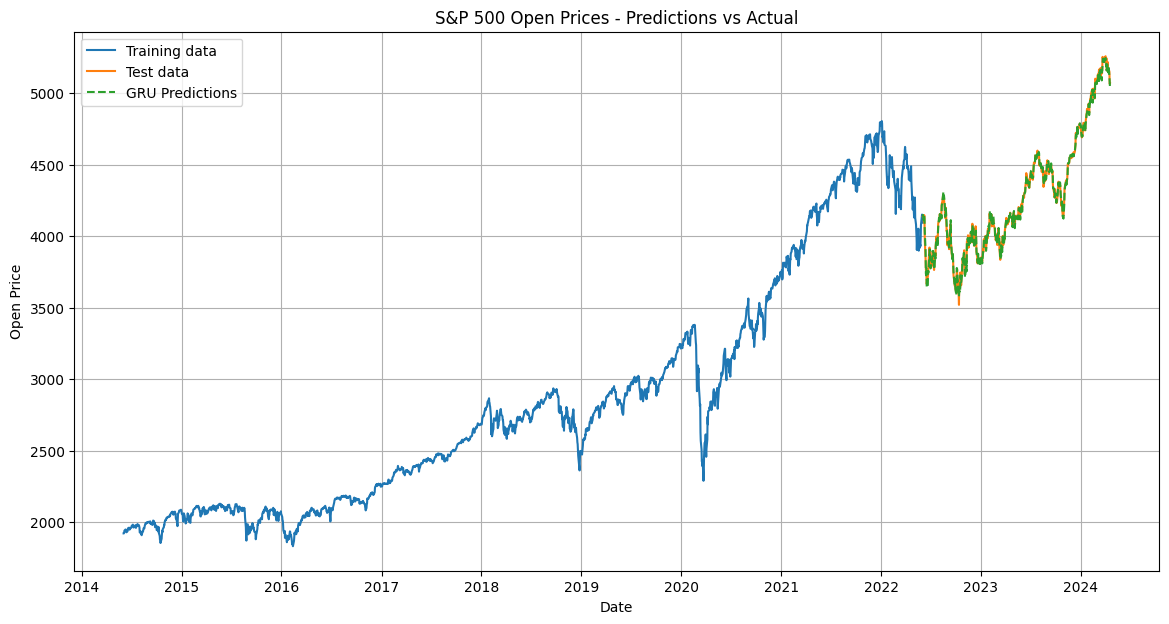

In [82]:
# Correct the indices for plotting
plt.figure(figsize=(14, 7))
plt.plot(train_dates, scaler.inverse_transform(features_scaled[window_size:train_size+window_size, :])[:, 0], label='Training data')
plt.plot(test_dates, scaler.inverse_transform(features_scaled[train_size+window_size:, :])[:, 0], label='Test data')
plt.plot(test_dates, invert_predictions(gru_predictions), label='GRU Predictions',linestyle='--')
plt.title('S&P 500 Open Prices - Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(True)

plt.show()

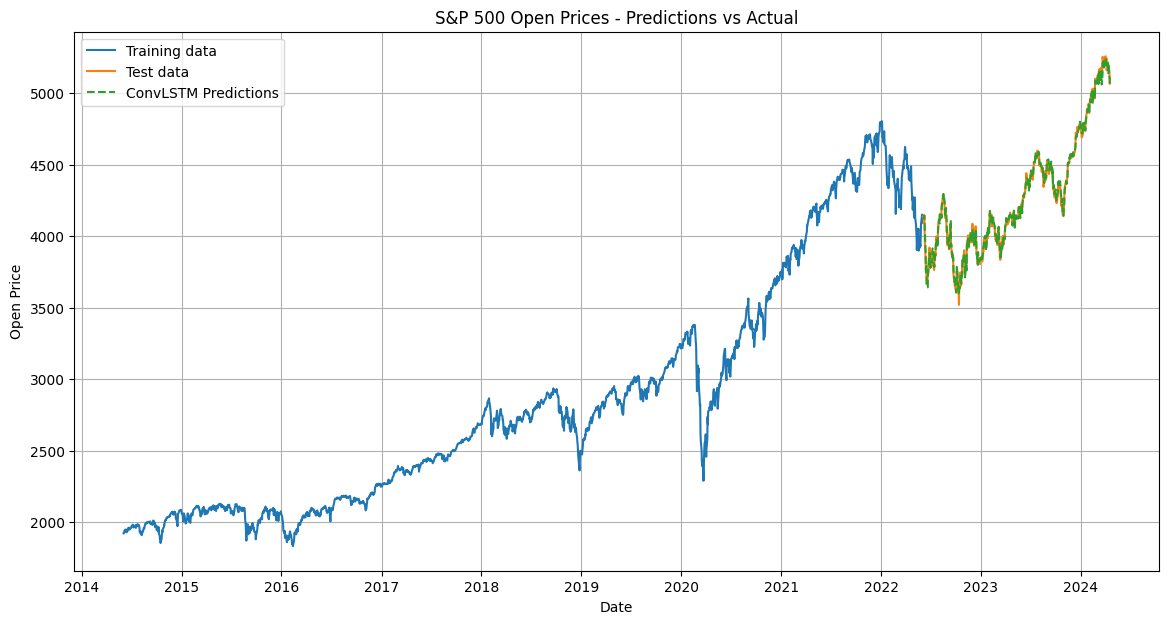

In [83]:
# Correct the indices for plotting
plt.figure(figsize=(14, 7))
plt.plot(train_dates, scaler.inverse_transform(features_scaled[window_size:train_size+window_size, :])[:, 0], label='Training data')
plt.plot(test_dates, scaler.inverse_transform(features_scaled[train_size+window_size:, :])[:, 0], label='Test data')
plt.plot(test_dates, invert_predictions(convlstm_predictions), label='ConvLSTM Predictions',linestyle='--')
plt.title('S&P 500 Open Prices - Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(True)

plt.show()

In [71]:
from sklearn.metrics import mean_squared_error, r2_score


In [75]:
# Calculate RMSE and R2 for each model and save results in a dictionary

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Invert test data for comparison
actual_prices = scaler.inverse_transform(features_scaled[train_size+window_size:, :])[:, 0]

# Invert model predictions
lstm_actual_predictions = invert_predictions(lstm_predictions)
gru_actual_predictions = invert_predictions(gru_predictions)
convlstm_actual_predictions = invert_predictions(convlstm_predictions)
rnn_actual_predictions = invert_predictions(rnn_predictions)

# Calculate RMSE and R2 for each model and store in a dictionary
rms_lstm,r2_lstm = calculate_rmse(actual_prices, lstm_actual_predictions), r2_score(actual_prices, lstm_actual_predictions)
rms_gru,r2_gru = calculate_rmse(actual_prices, gru_actual_predictions), r2_score(actual_prices, gru_actual_predictions)
rms_convlstm,r2_convlstm = calculate_rmse(actual_prices, convlstm_actual_predictions), r2_score(actual_prices, convlstm_actual_predictions)
rms_rnn,r2_rnn = calculate_rmse(actual_prices, rnn_actual_predictions), r2_score(actual_prices, rnn_actual_predictions)



In [76]:
results = {}
results['models']=['LSTM','GRU','ConvLSTM','RNN']
results['RMSE']=[rms_lstm,rms_gru,rms_convlstm,rms_rnn]
results['R2']=[r2_lstm,r2_gru,r2_convlstm,r2_rnn]

In [79]:

# Print the results
for model, rmse,r2 in zip(results['models'],results['RMSE'],results['R2']):
    print(f"{model} RMSE: {rmse:.4f}")
    print(f"{model} R2: {r2:.4f}")

LSTM RMSE: 39.2861
LSTM R2: 0.9909
GRU RMSE: 22.4431
GRU R2: 0.9970
ConvLSTM RMSE: 26.2541
ConvLSTM R2: 0.9959
RNN RMSE: 29.6405
RNN R2: 0.9948


In [80]:
import json
# Save the results to a JSON file
with open('DL_model_performance_results.json', 'w') as file:
    json.dump(results, file, indent=4)